In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data.iloc[:,:] = imputer.fit_transform(data)

In [5]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
from sklearn import preprocessing

lb = preprocessing.LabelEncoder()
data["type"] = lb.fit_transform(data["type"])
data["type"].unique()

array([1, 0])

In [7]:
x=data.drop(['type'],axis=1)
y=data['type']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)



In [11]:
from sklearn.naive_bayes import MultinomialNB

m= MultinomialNB()
m.fit(x, y)

MultinomialNB()

In [20]:
pred=m.predict(xtest)

In [21]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(ytest,pred)
confusion_matrix

array([[ 396,   80],
       [  72, 1402]], dtype=int64)

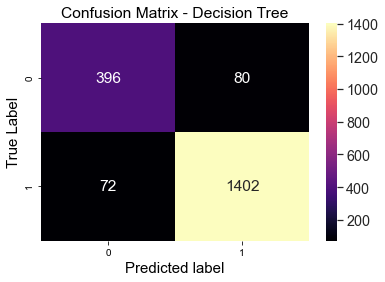

<Figure size 720x504 with 0 Axes>

In [22]:
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)

ax.set_ylabel("True Label", fontsize=15)

plt.show()

In [23]:
from sklearn.metrics  import accuracy_score

score = accuracy_score(ytest, pred)
print(score)

0.9220512820512821


In [24]:

print('\n Accuracy of the classifier is',metrics.accuracy_score(ytest,pred))

print('\n The value of Precision', metrics.precision_score(ytest,pred))

print('\n The value of Recall', metrics.recall_score(ytest,pred))



 Accuracy of the classifier is 0.9220512820512821

 The value of Precision 0.9460188933873145

 The value of Recall 0.9511533242876526
